# Trie (Prefix Trees)

A trie, often referred to as prefix tree, is a tree data structure that's used to find words, given a prefix. It has an empty root node, and then branches out character by character, so it can store multiple strings:

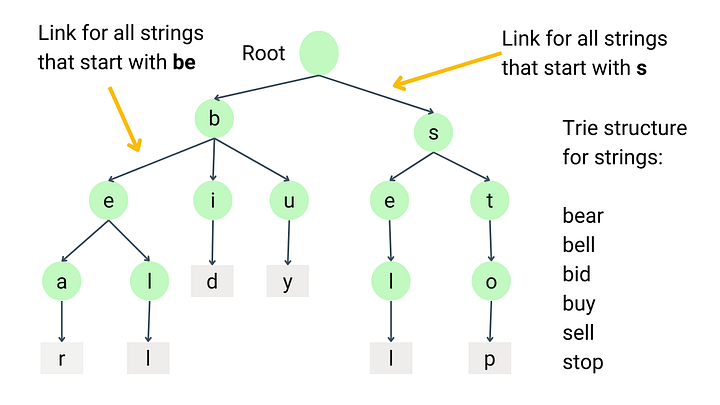

Note that the grey boxes demarcate the last character and hence a word

**Advantages:**
- Insert Word: $O(1)$
- Search Word: $O(1)$
- Search Prefix: $O(1)$

> These operations can also be done with a hashmap, but a hashmap only supports an exact search for the string. 
> 
> In the worst case, it will take $O(n)$ time, where $n$ is the size of hashmap, to find the prefix.
> 
> A prefix tree allows us to get all words with that prefix in $O(m)$ time, where $m$ is the length of the prefix


## Implementation

### TrieNode Class

```python
class TrieNode:
    def __init__(self):
        #the next layer of children
        #this ONLY STORES its children, not the value of the node itself
        #we in fact don't really need the value of the node!
        #the keys of this dict represents the value of the next node, while the value is the children of that next node
        self.children = {}
        #this determines whether this character is the last character; AKA all the characs before it represents a word
        self.word = False
```

### Trie Class

```python
class Trie:
    def __init__(self):
        #this is an "empty" node
        self.root = TrieNode()
```

**Insert**

To insert into the trie, we can iterate through each character of the word we wish to insert. If the character does not exist, we can insert it into our hashmap, along with its children. Otherwise, we can keep traversing down the tree. Once we have reached the last character, we can mark that `TrieNode` as a word. Since we use a hashmap to store children (characters only not words), we can retrieve children in $O(1)$ time

```python
def insert(self, word):
    curr = self.root
    #iterate through each level one by one and check
    for c in word:
        #if this character that doesnt exist, create a new node
        if c not in curr.children:
            curr.children[c] = TrieNode()
        #continue going down
        curr = curr.children[c]
    #finished inserting, then mark the last character as the last character of the word, so we know that word exists
    curr.word = True
```

Insert Apple

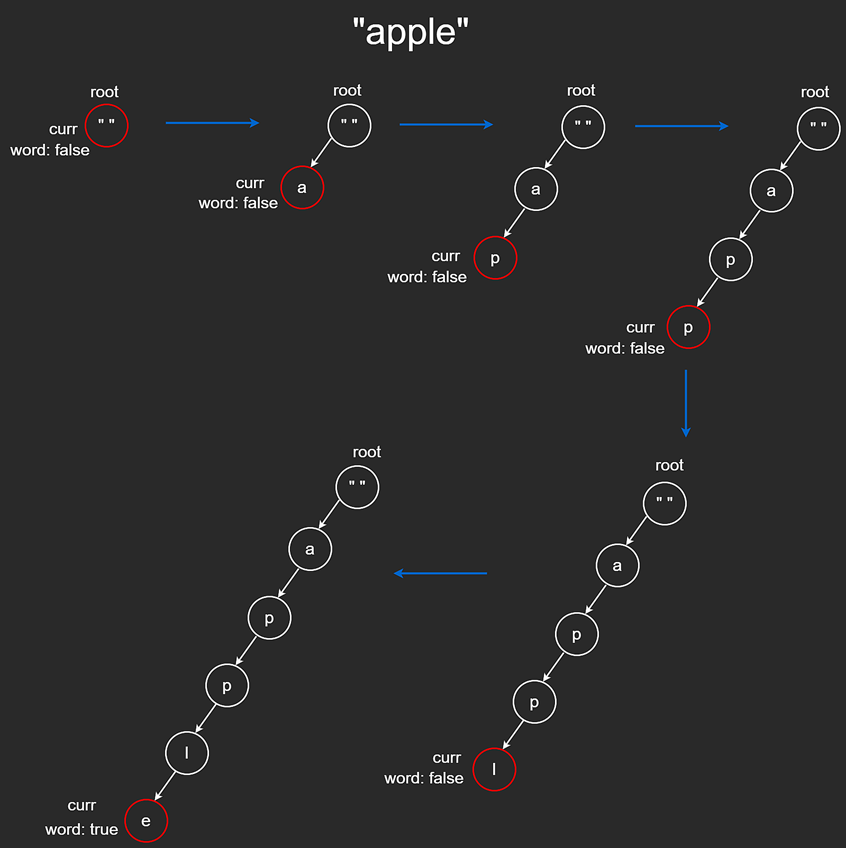

Insert Ape

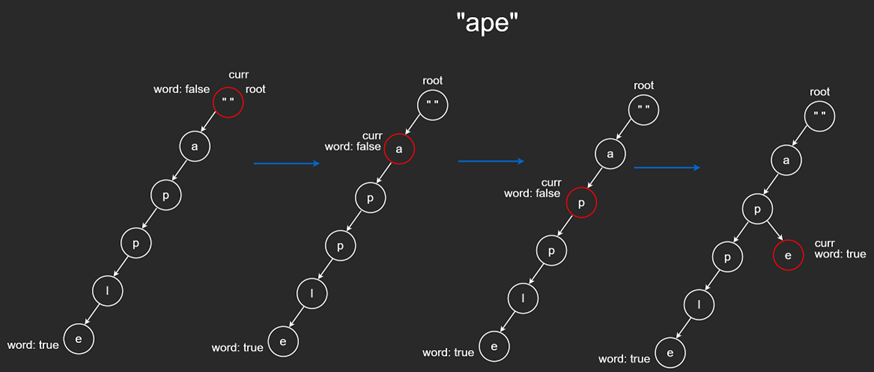

**Search**

We can search whether a *word* (not prefix) exists in our trie. We iterate through each character
- as soon as we encounter a character that is not in our tree, we can return false
- And the last character we're interested in must be marked as a word
  - Say we want to find `app`. It be that the prefix `app` is present because `apple` exists, but not the word `app`

```python
def search(self, word):
    curr = self.root
    for c in word:
        if c not in curr.children:
            return False
        curr = curr.children[c]
    return curr.word
```

**StartsWith**

If we wanted to see if our tree contains a word with a specific prefix, we can usily verify that.

```python
def startsWith(self, prefix):
    curr = self.root
    for c in prefix:
        if c not in curr.children:
            return False
        curr = curr.children[c]
    return True
```

## Time Complexity

If we only had a list of words, the brute-force way of searching will be to iterate over all words and check which ones match. This will be $O(n*m)$ time, where $n$ is the number of words in our list and $m$ is the average length of each word.

Tries allow us to do this in $O(m)$ time.

